In [96]:
%load_ext autoreload
%autoreload 2
%env MIRA_REST_URL=http://34.230.33.149:8771


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: MIRA_REST_URL=http://34.230.33.149:8771


In [169]:
from mira.sources import biomodels
from mira.metamodel.comparison import *
from mira.dkg.web_client import is_ontological_child_web
from mira.examples.sir import * 
from copy import deepcopy
from mira.metamodel.template_model import *
from mira.metamodel.templates import *

from mira.examples.jin2022 import seird_stratified
from mira.examples.chime import sviivr

In [98]:
rc = get_dkg_refinement_closure()

In [99]:
NON_COVID_EPI_MODELS_SET= {
    "MODEL1808280006",  # SIRWS model with immune boosting and cross-immunity between two pathogens
}


In [109]:
tm_list = [] 
tm_list.append(sir_parameterized)

for bio_model_id in NON_COVID_EPI_MODELS_SET:
    bio_model = biomodels.get_template_model(bio_model_id)
    tm_list.append(bio_model)




In [123]:
tm_list = []
tm_list.append(seird_stratified)
tm_list.append(sviivr)

In [124]:
tm_comparison = TemplateModelComparison(tm_list,refinement_func=rc.is_ontological_child)

Comparing model templates: 66it [00:00, 18040.02it/s]
Comparing model concepts: 91it [00:00, 80967.68it/s]


In [125]:
tm_comparison.model_comparison.get_similarity_score(0,1)

0.6666666666666666

In [126]:
test = tm_comparison.model_comparison

In [92]:
tmd = TemplateModelDelta(tm_comparison.template_models[0],tm_comparison.template_models[1],rc.is_ontological_child)



In [131]:
image = TemplateModelDelta.for_jupyter(tm_comparison.template_models[0],tm_comparison.template_models[1],rc.is_ontological_child)

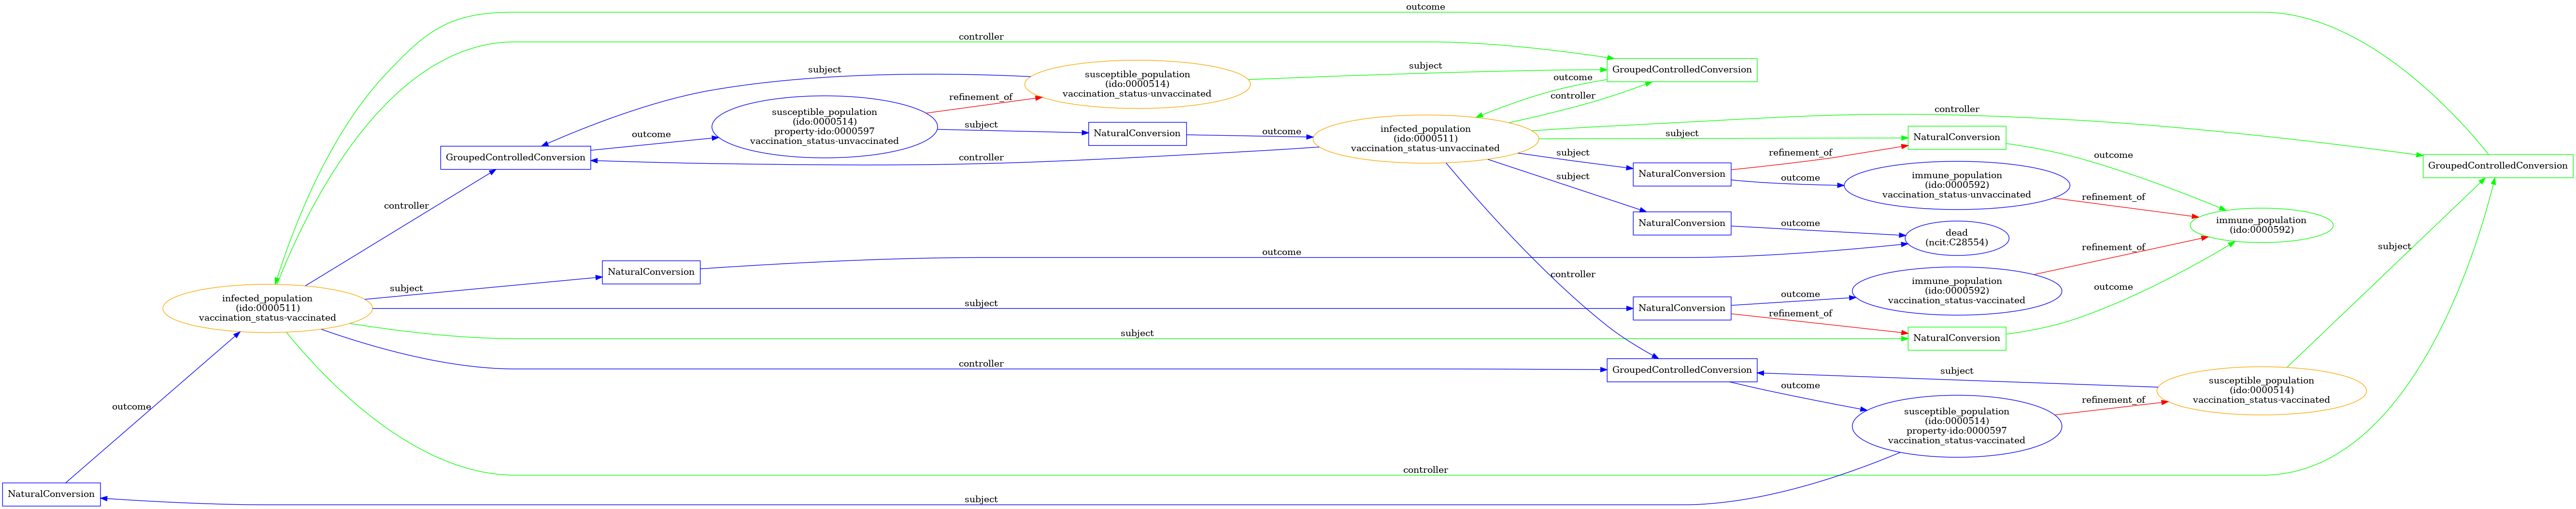

In [132]:
image

In [136]:
se_copy = deepcopy(seird_stratified)
sv_copy = deepcopy(sviivr)

In [138]:
se_concepts = seird_copy.get_concepts_map()
sv_concepts = sviivrr_copy.get_concepts_map()

In [144]:
for k,v in se_concepts.items():
    print(type(k))
    print(type(v))

<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>
<class 'tuple'>
<class 'mira.metamodel.templates.Concept'>


In [194]:
copied_tm_list = [se_copy,sv_copy] 

In [195]:
for copied_tm in copied_tm_list:
    for template in copied_tm.templates:
        if isinstance(template, NaturalConversion):
            template.subject.identifiers = {}
            template.subject.context = {}
            template.outcome.identifiers = {}
            template.outcome.context = {}
        elif isinstance(template, GroupedControlledConversion):
            for concept in template.controllers:
                concept.identifiers = {}
                concept.context = {}       
                # controller_template.subject.identifiers=None
                # controller_template.subject.context=None
                # controller_template.outcome.identifiers=None
                # controller_template.outcome.context=None


          
            
            
        

In [197]:
tm_comparison_copy = TemplateModelComparison(copied_tm_list,refinement_func=rc.is_ontological_child)

Comparing model templates: 28it [00:00, 16395.44it/s]
Comparing model concepts: 91it [00:00, 172006.16it/s]


In [198]:
tm_comparison_copy.model_comparison.get_similarity_score(0,1)

0.625

In [199]:
image = TemplateModelDelta.for_jupyter(se_copy,sv_copy,rc.is_ontological_child)

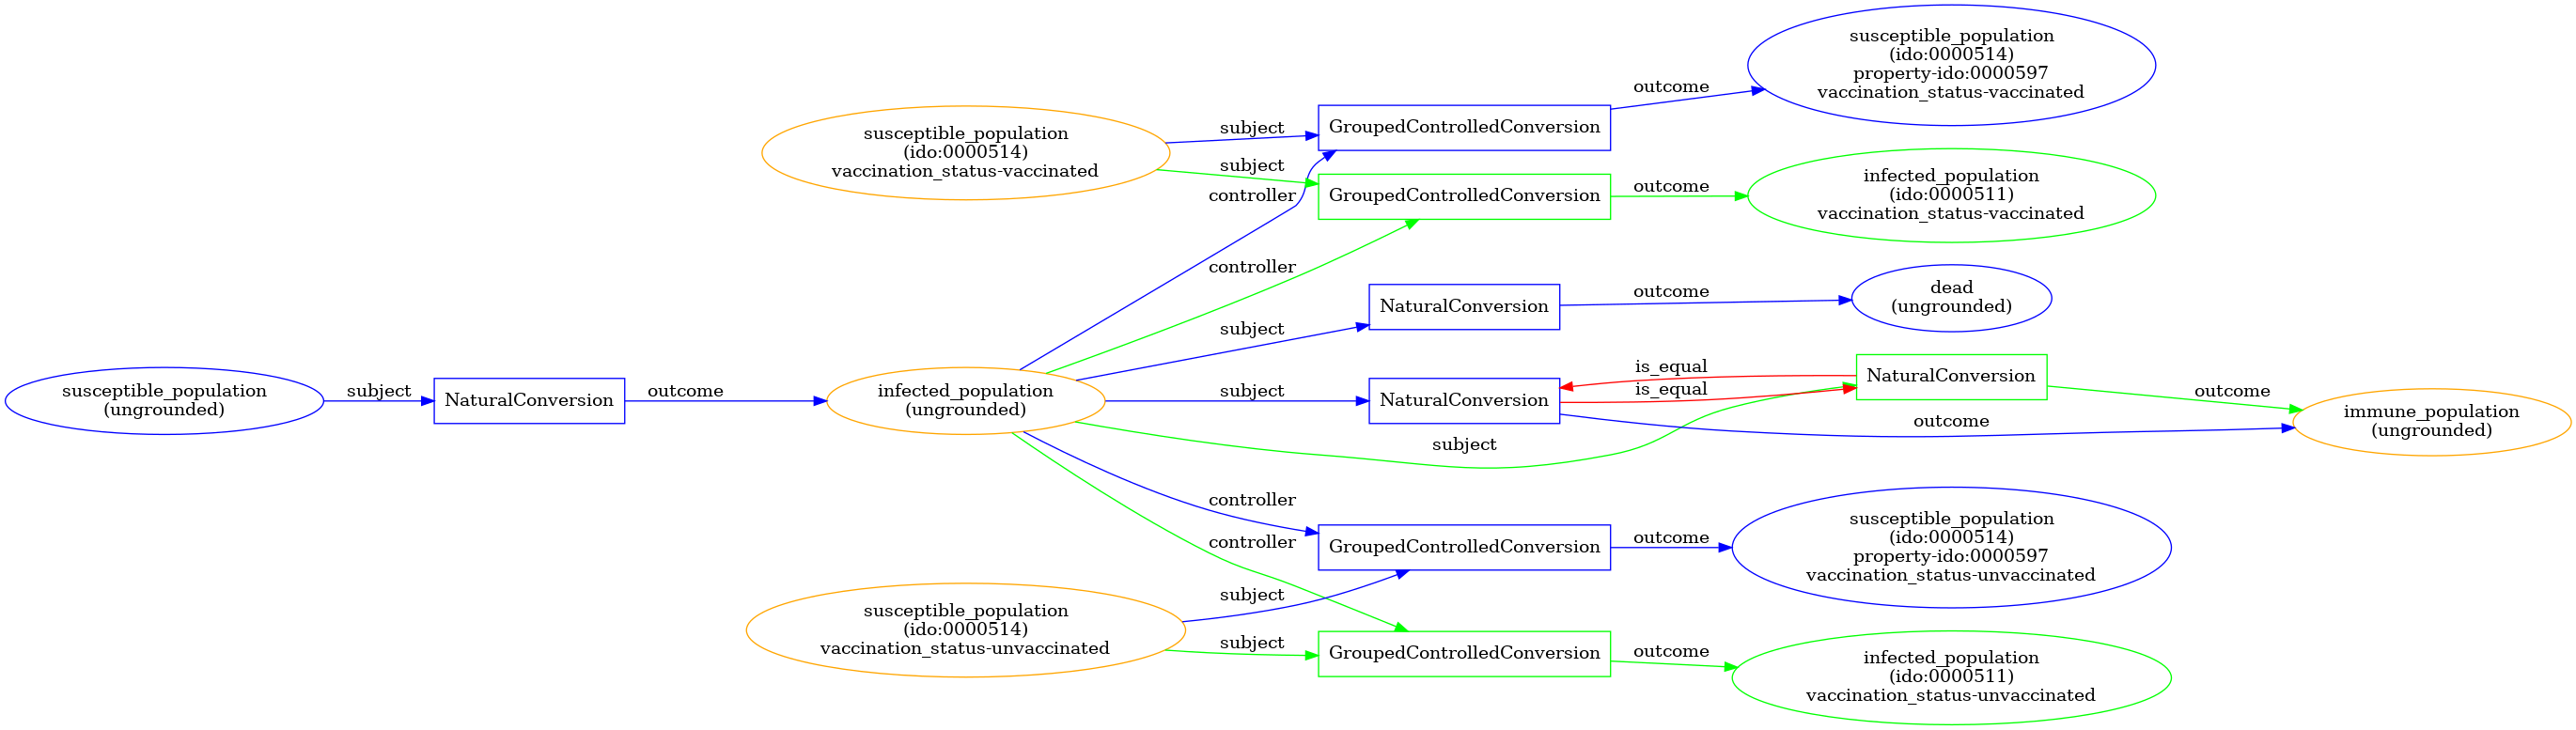

In [200]:
image